#  Indian Startup Funding- Funding details of the startups in India

- This dataset is downloaded from Kaggle.
- The dataset has funding information of the Indian startups from 2015 to 2020. It includes columns with the date funded, the city the startup is based out of, the names of the funders, and the amount invested (in USD).

### Possible questions which could be answered are:

- How does the funding ecosystem change with time?
- Do cities play a major role in funding?
- Which industries are favored by investors for funding?
- Who are the important investors in the Indian Ecosystem?
- How much funds does startups generally get in India?



In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv('startup_funding.csv')
df.shape

(3044, 10)

In [72]:
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [73]:
df.values

array([[1, '09/01/2020', 'BYJU’S', ..., 'Private Equity Round',
        '20,00,00,000', nan],
       [2, '13/01/2020', 'Shuttl', ..., 'Series C', '80,48,394', nan],
       [3, '09/01/2020', 'Mamaearth', ..., 'Series B', '1,83,58,860',
        nan],
       ...,
       [3042, '30/01/2015', 'Mad Street Den', ..., 'Private Equity',
        '15,00,000', nan],
       [3043, '30/01/2015', 'Simplotel', ..., 'Private Equity', nan,
        'Strategic Funding, Minority stake'],
       [3044, '31/01/2015', 'couponmachine.in', ..., 'Seed Funding',
        '1,40,000', nan]], dtype=object)

In [74]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [75]:
df.tail()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3043,3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [77]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [78]:
df.rename(columns={
    'Date dd/mm/yyyy':'Date',
    'Startup Name':'Startup',
    'Industry Vertical':'Vertical',
    'SubVertical':'Subvertical',
    'City  Location':'City',
    'Investors Name':'Investor',
    'InvestmentnType':'Type',
    'Amount in USD':'Amount', 
    'Remarks' : 'Remarks'
},inplace=True)

In [79]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

Sr No             0
Date              0
Startup           0
Vertical        171
Subvertical     936
City            180
Investor         24
Type              4
Amount          960
Remarks        2625
dtype: int64


In [80]:
# Dropping the Remarks column
df.drop(columns=['Remarks'],inplace=True)

In [81]:
print(missing_values)

Sr No             0
Date              0
Startup           0
Vertical        171
Subvertical     936
City            180
Investor         24
Type              4
Amount          960
Remarks        2625
dtype: int64


In [82]:
# Clean the 'Amount' column by removing non-numeric characters
df['Amount'] = df['Amount'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))


In [83]:
# Convert the 'Amount' column to floats
df['Amount'] = df['Amount'].apply(lambda x: float(x) if x else float('nan'))

In [84]:
# Drop rows with missing values
df.dropna(inplace=True)

In [85]:
df.sample(10)

,Sr No,Date,Startup,Vertical,Subvertical,City,Investor,Type,Amount
831,832,19/05/2017,EzCred,Consumer Internet,Consumer Lending Platform,Bangalore,"Dheeraj Pandey, Rajesh Yohannan, Akash Garg",Seed Funding,1000000.0
1419,1420,02/08/2016,Yumlane,Food & Beverage,Retail Food & Snack Offline centres,Mumbai,"Binny Bansal, Anupam Mittal, Sachin Bhatia, Da...",Seed Funding,1000000.0
211,212,23/07/2018,VTION,Technology,Media Analytics,Gurugram,"AngelList, Rahul Khanna, Rajeev Arora and Ram ...",Seed/ Angel Funding,280000.0
2075,2076,21/01/2016,Housing.com,Consumer Internet,Online Real Estate Portal,Mumbai,SoftBank Corp,Private Equity,15000000.0
636,637,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0
40,41,04/09/2019,Myelin Foundry,Information Technology,Deep-technology,Bengaluru,Endiya Partners,Seed,1000000.0
777,778,27/06/2017,Spares Hub,eCommerce,Automobile parts marketplace,Pune,"The Chennai Angels, Anthill Scale Ventures, Es...",Seed Funding,311000.0
1945,1946,12/02/2016,ActOnMagic,Technology,Cloud Analytics and Management Products,Bangalore,Jayabalan Subramanian,Seed Funding,125000.0
746,747,13/06/2017,Goodera,Technology,CSR and sustainability management platform,Bangalore,"Nexus Venture Partners, Omidyar Network",Private Equity,5500000.0
1497,1498,31/08/2016,Flyrobe,eCommerce,Online fashion rental platform,Mumbai,"IDG Ventures, Sequoia Capital, GREE Ventures",Private Equity,5300000.0


In [86]:
# Save the cleaned dataset
df.to_csv('cleaned_startup_funding.csv', index=False)

# Using the Cleaned DataSet   "cleaned_startup_funding.csv" and plotting visualizations usinf matploitlib

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df1 = pd.read_csv('cleaned_startup_funding.csv')

# Convert 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y', errors='coerce')

# Drop rows with missing or invalid dates
df1.dropna(subset=['Date'], inplace=True)

# Extract year from the 'Date' column
df1['Year'] = df1['Date'].dt.year

# Group the data by year and calculate the total funding amount
funding_by_year = df1.groupby('Year')['Amount'].sum()



### Plotting the line graph to show how the funding ecosystem changes with time?

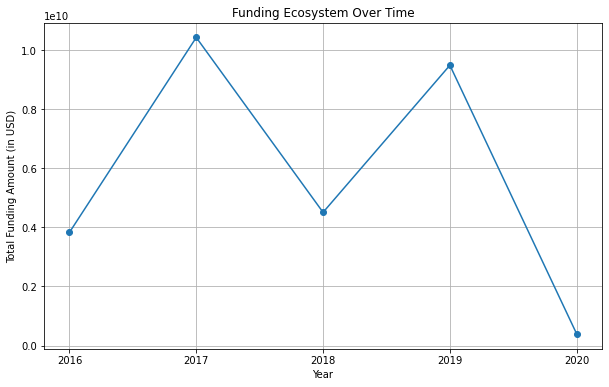

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(funding_by_year.index, funding_by_year.values, marker='o')
plt.title('Funding Ecosystem Over Time')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in USD)')
plt.grid(True)
plt.xticks(funding_by_year.index)
plt.show()

### Plot graph as to which cities play a major role in funding?

In [89]:
# Replace 'Bangalore' with 'Bengaluru' in 'CityLocation' column
df1['City'] = df1['City'].replace('Bangalore', 'Bengaluru')

# Group the data by city and calculate the total funding amount
funding_by_city = df1.groupby('City')['Amount'].sum().sort_values(ascending=False)

# Select the top 10 cities with the highest funding amounts
top_cities = funding_by_city.head(10)

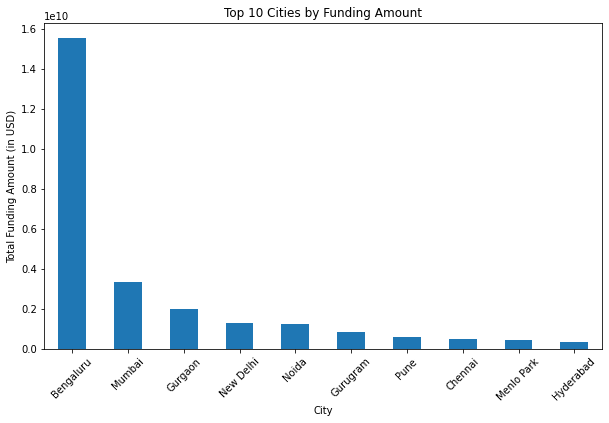

In [90]:
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar')
plt.title('Top 10 Cities by Funding Amount')
plt.xlabel('City')
plt.ylabel('Total Funding Amount (in USD)')
plt.xticks(rotation=45)
plt.show()

###  Plotting a graph showing which industries are favored by investors for funding

In [91]:
# Group the data by industry and count the number of investments
funding_by_industry = df1.groupby('Vertical')['Amount'].sum().sort_values(ascending=False)

# Select the top 10 industries with the highest number of investments
top_industries = funding_by_industry.head(10)


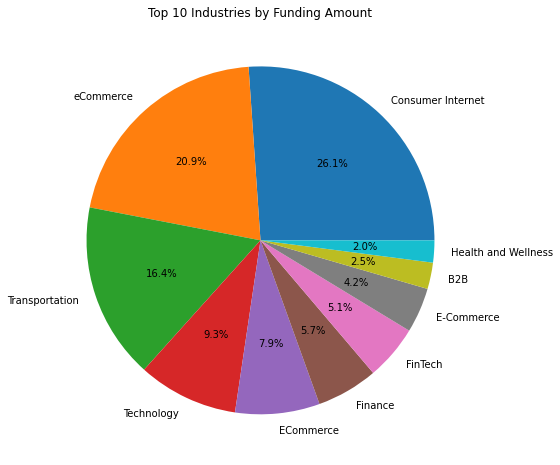

In [92]:
plt.figure(figsize=(8, 8))
plt.pie(top_industries, labels=top_industries.index, autopct='%1.1f%%')
plt.title('Top 10 Industries by Funding Amount')
plt.show()

### Ploting a graph to identify the important investors in the Indian ecosystem

In [93]:
# Group the data by investor name and count the occurrences
investor_counts = df1['Investor'].value_counts().head(10)

# Select the top 10 investors with the highest frequency
top_investors = investor_counts.head(10)

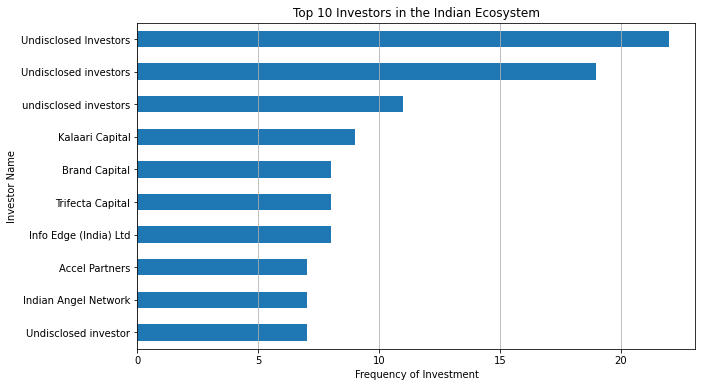

In [94]:
plt.figure(figsize=(10, 6))
investor_counts.sort_values().plot(kind='barh')
plt.title('Top 10 Investors in the Indian Ecosystem')
plt.xlabel('Frequency of Investment')
plt.ylabel('Investor Name')
plt.grid(axis='x')
plt.show()

###  How much funds does startups generally get in India?

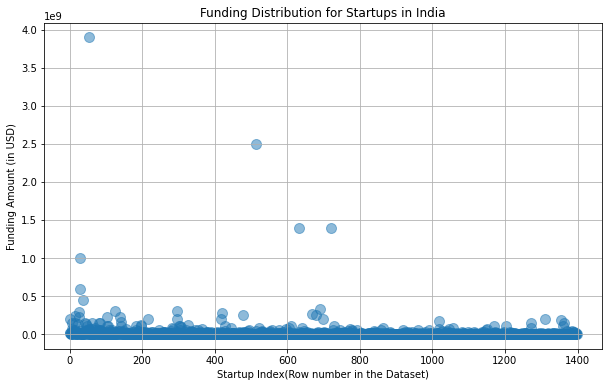

In [95]:
# Load the cleaned dataset
df1 = pd.read_csv('cleaned_startup_funding.csv')

# Get the funding amount and startup index
funding_amounts = df1['Amount']
startup_index = df1.index

# Plot the scatter graph
plt.figure(figsize=(10, 6))
plt.scatter(startup_index, funding_amounts, s=100, alpha=0.5)
plt.title('Funding Distribution for Startups in India')
plt.xlabel('Startup Index(Row number in the Dataset)')
plt.ylabel('Funding Amount (in USD)')
plt.grid(True)
plt.show()
